## Coco Cola Sales Forecasting

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.holtwinters import SimpleExpSmoothing # SES
from statsmodels.tsa.holtwinters import Holt # Holts Exponential Smoothing
from statsmodels.tsa.holtwinters import ExponentialSmoothing # 
import statsmodels.graphics.tsaplots as tsa_plots
import statsmodels.tsa.statespace as tm_models
from datetime import datetime,time

C:\Users\ppran\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:7: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import (to_datetime, Int64Index, DatetimeIndex, Period,
C:\Users\ppran\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:7: FutureWarning: pandas.Float64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import (to_datetime, Int64Index, DatetimeIndex, Period,


In [2]:
df=pd.read_excel("CocaCola_Sales_Rawdata.xlsx")
df

,Quarter,Sales
0,Q1_86,1734.827000
1,Q2_86,2244.960999
2,Q3_86,2533.804993
3,Q4_86,2154.962997
4,Q1_87,1547.818996
5,Q2_87,2104.411995
6,Q3_87,2014.362999
7,Q4_87,1991.746998
8,Q1_88,1869.049999
9,Q2_88,2313.631996


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42 entries, 0 to 41
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Quarter  42 non-null     object 
 1   Sales    42 non-null     float64
dtypes: float64(1), object(1)
memory usage: 800.0+ bytes


In [4]:
df.isnull().sum()

Quarter    0
Sales      0
dtype: int64

<AxesSubplot:>

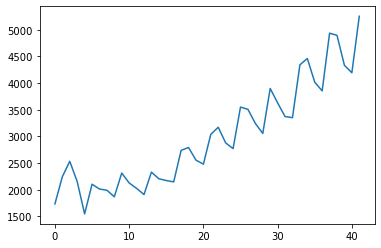

In [5]:
df["Sales"].plot()

In [6]:
df.shape

(42, 2)

In [7]:
df['t'] = np.arange(1,43)
df['t_squared'] = df['t']**2
df["Sales_log"] =np.log(df['Sales'])

In [8]:
df.head(5)

,Quarter,Sales,t,t_squared,Sales_log
0,Q1_86,1734.827000,1,1,7.458663
1,Q2_86,2244.960999,2,4,7.716443
2,Q3_86,2533.804993,3,9,7.837477
3,Q4_86,2154.962997,4,16,7.675529
4,Q1_87,1547.818996,5,25,7.344602


In [9]:
train =df.head(32)
test =df.tail(10)

In [10]:
from sklearn.metrics import mean_squared_error
import statsmodels.formula.api as smf

In [11]:
# Linear Model
linear_model =smf.ols("Sales~t",data =train).fit()
linear_pred = pd.Series(linear_model.predict(test['t']))
linear_rmse =np.sqrt(mean_squared_error(np.array(test['Sales']),np.array(linear_pred)))
linear_rmse

752.9233932767115

In [12]:
#Quadratic Model
quad_model =smf.ols("Sales~t+t_squared",data=train).fit()
quad_pred = pd.Series(quad_model.predict(test[['t','t_squared']]))
quad_rmse =np.sqrt(mean_squared_error(np.array(test['Sales']),np.array(quad_pred)))
quad_rmse

457.73573554072897

In [13]:
# Exponential model
exp_model  =smf.ols("Sales_log~t",data=train).fit()
exp_pred =pd.Series(exp_model.predict(test['t']))
exp_rmse =np.sqrt(mean_squared_error(np.array(test['Sales']),np.array(exp_pred)))
exp_rmse

4387.940544839098

In [14]:
data = {"MODEL":pd.Series(["rmse_linear","rmse_exp","rmse_quad"]),"RMSE_Values":pd.Series([linear_rmse,exp_rmse,quad_rmse,])}
table_rmse=pd.DataFrame(data)
table_rmse.sort_values(['RMSE_Values'])

,MODEL,RMSE_Values
2,rmse_quad,457.735736
0,rmse_linear,752.923393
1,rmse_exp,4387.940545


## Arima Model

In [15]:
data =pd.read_excel("CocaCola_Sales_Rawdata.xlsx",header=0,index_col=0, parse_dates=True)
data.head()

,Sales
Quarter,
Q1_86,1734.827000
Q2_86,2244.960999
Q3_86,2533.804993
Q4_86,2154.962997
Q1_87,1547.818996


In [16]:
from statsmodels.tsa.stattools import adfuller
from pmdarima import auto_arima
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error
data.shape

(42, 1)

In [17]:
stepwise_fit = auto_arima(df['Sales'], trace=True,suppress_warnings=True)

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=579.745, Time=0.10 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=617.615, Time=0.01 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=619.036, Time=0.01 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=607.723, Time=0.02 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=617.215, Time=0.01 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=607.920, Time=0.07 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=592.020, Time=0.07 sec
 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=559.112, Time=0.09 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=560.355, Time=0.09 sec
 ARIMA(4,1,2)(0,0,0)[0] intercept   : AIC=558.429, Time=0.10 sec
 ARIMA(4,1,1)(0,0,0)[0] intercept   : AIC=555.524, Time=0.05 sec
 ARIMA(4,1,0)(0,0,0)[0] intercept   : AIC=554.097, Time=0.09 sec
 ARIMA(3,1,0)(0,0,0)[0] intercept   : AIC=575.252, Time=0.04 sec
 ARIMA(5,1,0)(0,0,0)[0] intercept   : AIC=555.874, Time=0.10 sec
 ARIMA(5,1,1)(0,0,0)[0] intercept   : AIC=558.7

In [18]:
#Split the data
train=data.iloc[:-9]
test=data.iloc[-9:]
print(train.shape,test.shape)

(33, 1) (9, 1)


In [19]:
model = ARIMA(train['Sales'],order=(4,1,0))
model=model.fit()
model.summary()

C:\Users\ppran\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:578: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'
C:\Users\ppran\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:578: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'
C:\Users\ppran\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:578: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                  Sales   No. Observations:                   33
Model:                 ARIMA(4, 1, 0)   Log Likelihood                -211.616
Date:                Sun, 12 Feb 2023   AIC                            433.232
Time:                        15:30:25   BIC                            440.560
Sample:                             0   HQIC                           435.661
                                 - 33                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.2034      0.114     -1.789      0.074      -0.426       0.019
ar.L2         -0.1764      0.117     -1.502      0.133      -0.407       0.054
ar.L3         -0.0632      0.097     -0.649      0.516      -0.254       0.128
ar.L4          0.7837      0.103      7.643      0.000       0.583       0.985
sigma2      2.395e+04   5982.053      4.003      0.000    1.22e+04    3.57e+04
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):                 0.05
Prob(Q):                              0.96   Prob(JB):                         0.98
Heteroskedasticity (H):               0.33   Skew:                            -0.10
Prob(H) (two-sided):                  0.08   Kurtosis:                         3.01
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [20]:
test

,Sales
Quarter,
Q2_94,4342.0
Q3_94,4461.0
Q4_94,4017.0
Q1_95,3854.0
Q2_95,4936.0
Q3_95,4895.0
Q4_95,4333.0
Q1_96,4194.0
Q2_96,5253.0


C:\Users\ppran\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:376: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  warnings.warn('No supported index is available.'


<AxesSubplot:xlabel='Quarter'>

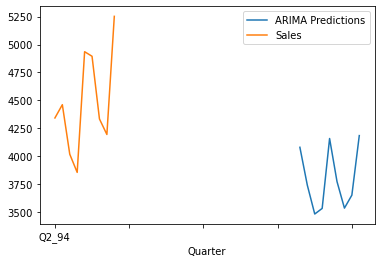

In [21]:
start=len(train)
end=len(train)+len(test)-1
pred=model.predict(start=start,end=end,typ='levels').rename('ARIMA Predictions')
pred.plot(legend=True)
test['Sales'].plot(legend=True)

In [24]:
from sklearn.metrics import mean_squared_error
from math import sqrt
test['Sales'].mean()
rmsearima=sqrt(mean_squared_error(pred,test['Sales']))
print(rmsearima)

739.8012243238857


In [25]:
data = {"MODEL":pd.Series(["rmse_linear","rmse_exp","rmse_quad","rmse_arima"]),"RMSE_Values":pd.Series([linear_rmse,exp_rmse,quad_rmse,rmsearima])}
table_rmse=pd.DataFrame(data)
table_rmse.sort_values(['RMSE_Values'])

,MODEL,RMSE_Values
2,rmse_quad,457.735736
3,rmse_arima,739.801224
0,rmse_linear,752.923393
1,rmse_exp,4387.940545


## Arima Model Has The lowest Rmse Value ..So Arima Model should be selected